In [34]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's have a look at the weather data for the four cities.  
Data was scraped from pages such as [http://en.tutiempo.net/climate/ws-76900.html](http://en.tutiempo.net/climate/ws-76900.html).  
The script used to scrape the website is not public but it's just requests + BeautifulSoup4.  
Data for each city was exported in an individual csv.  
Let's have look.  

In [35]:
nice = pd.read_csv('nice.csv')
nice[:5]

,month,avg_temp,max_temp,min_temp,humidity,rainfall,raindays,snowdays
0,01-2011,8.6,4.8,12.4,67.0,2.9,5,0
1,02-2011,9.3,7.1,11.1,69.1,2.9,5,0
2,03-2011,11.7,7.8,14.3,67.0,3.9,5,0
3,04-2011,15.6,13.3,18.5,67.4,0.4,1,0
4,05-2011,19.7,16.6,24.8,60.6,0.0,0,0


We can see the shape of our csv files.  
There are 8 columns, all pretty explicit and containing the average for the month in column month except for raindays and snowdays which contains the number of days in that month where it rained and snowed respectively.   

Note: I currently count raindays as the number of days where the rainfall is above 5mm (which is completely arbitrary).  
If you look at the website I scraped it does contain a column for rain days  but some days are marked as rain days when there is no rainfall and the reverse.  
Even then it's not really accurate as I'm only interested in quality of life and rain at 4am is not annoying lots of people.

From the table above we see that pandas doesn't know that our month column is our index and added a column. Let's get rid of it.

In [36]:
nice = pd.read_csv('nice.csv', index_col='month')
nice[:5]

,avg_temp,max_temp,min_temp,humidity,rainfall,raindays,snowdays
month,,,,,,,
01-2011,8.6,4.8,12.4,67.0,2.9,5,0
02-2011,9.3,7.1,11.1,69.1,2.9,5,0
03-2011,11.7,7.8,14.3,67.0,3.9,5,0
04-2011,15.6,13.3,18.5,67.4,0.4,1,0
05-2011,19.7,16.6,24.8,60.6,0.0,0,0


Cool. Let's try plotting something first to see if everything is okay and load the other cities.

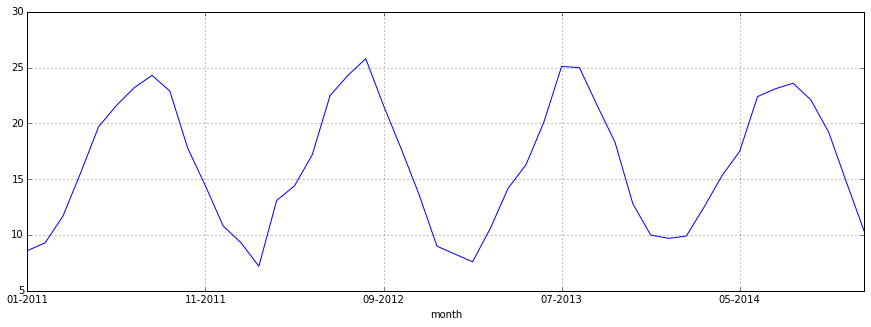

In [37]:
_ = nice['avg_temp'].plot(figsize=(15, 5))

In [74]:
montreal = pd.read_csv('montreal.csv', index_col='month')
okinawa = pd.read_csv('okinawa.csv', index_col='month')
london = pd.read_csv('london.csv', index_col='month')

Let's quickly check the median temperatures to get a feel and plot the average temperatures on a single chart.

In [39]:
{
    'montreal': montreal.avg_temp.median(),
    'nice': nice.avg_temp.median(),
    'okinawa': okinawa.avg_temp.median(),
    'london': london.avg_temp.median(),
}

{'london': 11.7, 'montreal': 8.65, 'nice': 15.95, 'okinawa': 23.65}

While we could continue having one dataframe per city, it is more convenient to have one dataframe containing all the data as this allows us to use plotting directly from the dataframe like we did above.

In [119]:
locations = ['nice', 'montreal', 'okinawa', 'london']
weather = pd.DataFrame()

for location in locations:
    frame = pd.read_csv('%s.csv' % location)
    frame['location'] = location
    weather = weather.append(frame)

# Alternative to using iterator
weather.head()

,month,avg_temp,max_temp,min_temp,humidity,rainfall,raindays,snowdays,location
0,01-2011,8.6,4.8,12.4,67.0,2.9,5,0,nice
1,02-2011,9.3,7.1,11.1,69.1,2.9,5,0,nice
2,03-2011,11.7,7.8,14.3,67.0,3.9,5,0,nice
3,04-2011,15.6,13.3,18.5,67.4,0.4,1,0,nice
4,05-2011,19.7,16.6,24.8,60.6,0.0,0,0,nice


We can also use .describe() on a dataframe instead of doing .median(), .sum() etc on every single column

In [118]:
weather.describe()

,avg_temp,max_temp,min_temp,humidity,rainfall,raindays,snowdays
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,14.698437,9.718750,19.635937,70.260937,3.507292,4.843750,2.114583
std,9.001405,11.141769,7.269971,7.409749,3.491553,3.241834,5.640857
min,-10.000000,-24.900000,1.600000,54.200000,0.000000,0.000000,0.000000
25%,9.150000,4.650000,13.950000,65.300000,1.400000,2.750000,0.000000
50%,16.250000,11.950000,20.950000,69.750000,2.700000,5.000000,0.000000
75%,21.025000,16.600000,25.225000,74.800000,3.900000,7.000000,0.000000
max,29.600000,28.400000,30.700000,87.500000,22.000000,15.000000,25.000000


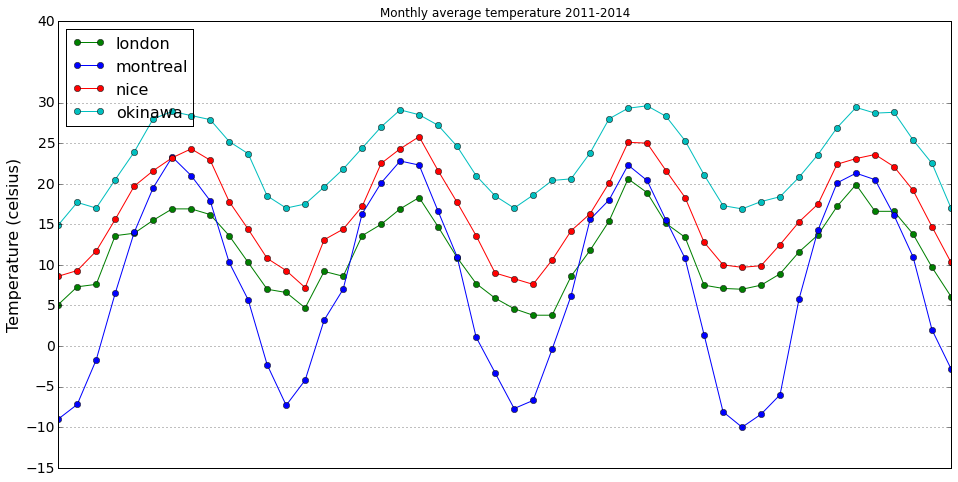

In [164]:
styles = {
    'london': 'go-',
    'nice': 'ro-',
    'montreal': 'bo-',
    'okinawa': 'co-',
}

# we define a method since we will need to do that pretty often
def plot_grouped_by(dataframe, column_name):
    """Plots the dataframe grouped by location for the given column"""    
    locations = dataframe.groupby('location')

    for loc_name, loc in locations:
        loc[column_name].plot(x='month', label=str(loc_name), style=styles[str(loc_name)])


plt.figure(figsize=(16, 8))
ax = plt.subplot(111)

plot_grouped_by(weather, 'avg_temp')

# Why yes I did 40 degrees just to be able to fit the legend properly
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40], fontsize=14) 
ax.xaxis.set_visible(False)
plt.legend(fontsize=16, loc="upper left")
plt.title("Monthly average temperature 2011-2014")
_ = plt.ylabel("Temperature (celsius)", fontsize=16) 

We can already make a few observations:

- 4 years on a plot like is hard to visualize
- Montreal gets cold during winter but gets almost as warm as Nice during summer
- London is disappointingly average
- Okinawa is hot (and as someone that lived there, the summer is actually horrible when you try to go outside and are not at the beach
- Nice has a pretty cool weather for the one who didn't know

For the next plots, let's focus on 2014 in order to have an idea on how a year looks like in those cities.

In [128]:
weather['month'] = pd.to_datetime(weather['month'], format="%m-%Y")
start = datetime.date(2014, 1,1)

weather_2014 = weather[weather.month >= start]
weather_2014.head()

,month,avg_temp,max_temp,min_temp,humidity,rainfall,raindays,snowdays,location,date
36,2014-01-01,9.7,6.4,12.4,71.6,9.2,11,0,nice,2014-01-01
37,2014-02-01,9.9,6.8,13.4,69.6,4.6,7,0,nice,2014-02-01
38,2014-03-01,12.5,7.4,15.4,62.3,2.7,3,0,nice,2014-03-01
39,2014-04-01,15.3,13.2,17.3,69.3,0.3,0,0,nice,2014-04-01
40,2014-05-01,17.5,14.4,20.2,64.1,0.6,1,0,nice,2014-05-01


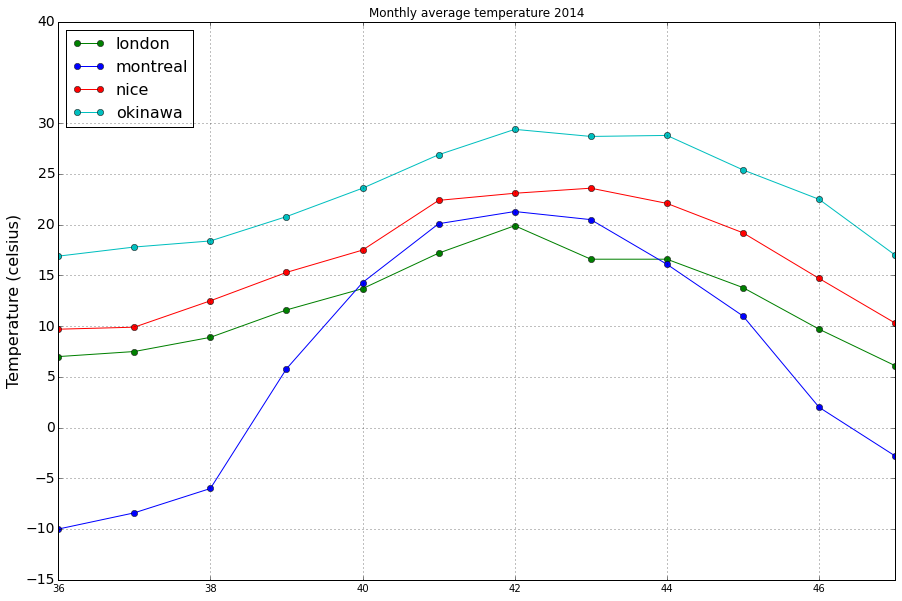

In [163]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

plot_grouped_by(weather_2014, 'avg_temp')
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40], fontsize=14)
plt.legend(fontsize=16, loc="upper left")
plt.title("Monthly average temperature 2014")
_ = plt.ylabel("Temperature (celsius)", fontsize=16) 